# __Parcial Corte 2 - Análisis de bases de datos__
# __Introducción a la BioIngienería__
* ## __Santiago Vivas__
* ## __Esteban Rodriguez__
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/U_Sergio_Arboleda_logo.svg/1200px-U_Sergio_Arboleda_logo.svg.png" alt="logo-universidad" width="200"/>

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
!wget https://physionet.org/static/published-projects/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0.zip
!wget https://physionet.org/static/published-projects/wrist/wrist-ppg-during-exercise-1.0.0.zip

--2024-04-23 12:38:23--  https://physionet.org/static/published-projects/bidmc/bidmc-ppg-and-respiration-dataset-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.13.52.205
Connecting to physionet.org (physionet.org)|18.13.52.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217902224 (208M) [application/zip]
Saving to: ‘bidmc-ppg-and-respiration-dataset-1.0.0.zip’

bidmc-ppg-and-respi 100%[===================>] 207.81M   463KB/s    in 7m 43s  

2024-04-23 12:46:07 (460 KB/s) - ‘bidmc-ppg-and-respiration-dataset-1.0.0.zip’ saved [217902224/217902224]

--2024-04-23 12:46:07--  https://physionet.org/static/published-projects/wrist/wrist-ppg-during-exercise-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.13.52.205
Connecting to physionet.org (physionet.org)|18.13.52.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52180873 (50M) [application/zip]
Saving to: ‘wrist-ppg-during-exercise-1.0.0.zip’

wrist-ppg-during-ex 100

In [ ]:
!unzip /content/bidmc-ppg-and-respiration-dataset-1.0.0.zip
!unzip /content/wrist-ppg-during-exercise-1.0.0.zip

Archive:  /content/bidmc-ppg-and-respiration-dataset-1.0.0.zip
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc50.breath  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc24n.hea  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc53n.hea  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc44.dat  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc20.breath  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc30.dat  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc25.breath  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc29.hea  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc29.dat  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc15.breath  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc23.hea  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc16.breath  
 extracting: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc23.breath  
 extracting: bidmc-ppg-and-respiration-dataset

In [148]:
import wfdb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **BIDMC PPG and Respiration Dataset**

## **Tipos de pacientes:**

Los datos originales fueron adquiridos de pacientes críticamente enfermos durante la atención hospitalaria en el Centro Médico Beth Israel Deaconess (Boston, MA, EE. UU.). En total se tomaron sñales para 53 pacientes

## **Principales variables Numéricas:**

Todas estas variables se tomaron con una frecuencia de 1Hz, durante un periodo de 8 minutos.

* HR: Ritmo cardíaco, medido en bpm (pulsos por miuto).
* PULSE: Pulso del paciente, medido en bpm.
* RESP: Número de respiraciones por minuto.
* SpO2: Saturación de oxígeno que mide el nivel de oxigeno en la sangre expresada como un porcentaje.

## **Principales variables Señales:**
Todas las variables se tomaron con una frecuencia de 125 Hz, durante 8 minutos.
* RESP: Impedancia respiratoria medida en pm
* PLETH: Fotopletismografía (PPG) medida usando un Opto-acoplador o un oxpimetro de pulso.
* V: Voltaje del ECG medido en (mV) milivoltios.
* AVR: potencial absoluto del brazo derecho medido en (mV).
* II: Diferencia de potencial entre brazo derecho y pierna izquierda medido en (mV).



# Análisis explratorio

In [137]:
path_0 = "/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc0"
path = "/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc"

signals, _ = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01")
patients = signals
for record in range(2, 54):
    if record < 10:
        signals, _ = wfdb.io.rdsamp(path_0 + str(record))
    else:
        signals, _ = wfdb.io.rdsamp(path + str(record))
    patients = np.concatenate([patients, signals[:-1,:5]], axis=0)


In [146]:
signals, fields = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01")
nombres = fields["sig_name"]
column_means = np.mean(patients, axis=0)
column_std = np.std(patients, axis=0)


for i in range(len(column_means)):
    print(f"Media de la variable {nombres[i]}: {column_means[i]}")

print("\n" * 3)

for i in range(len(column_std)):
    print(f"Desviación de la variable {nombres[i]}: {column_std[i]}")


Media de la variable RESP,: 1.8436177184873586
Media de la variable PLETH,: 6.096086669637468
Media de la variable V,: 0.9322312700578028
Media de la variable AVR,: 0.5823790669663502
Media de la variable II,: 0.7003557898651936




Media de la variable RESP,: 10.47407562442727
Media de la variable PLETH,: 21.5683868873987
Media de la variable V,: 2.6167380105449007
Media de la variable AVR,: 0.2903070965411652
Media de la variable II,: 0.46778077952674574


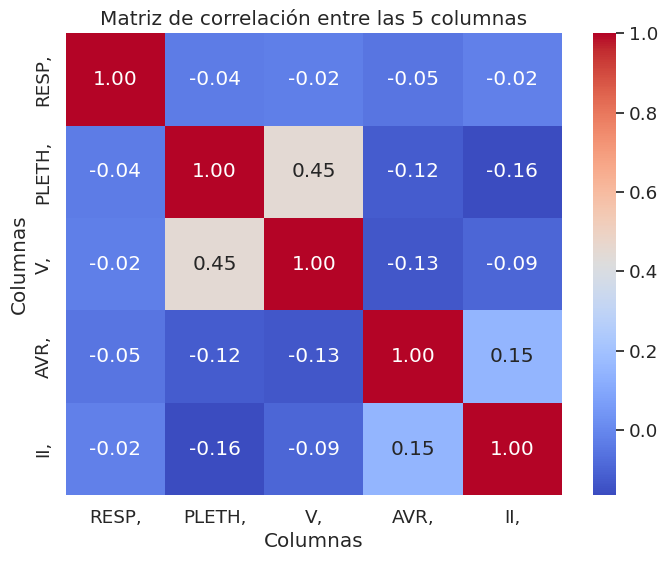

In [150]:
selected_columns = patients[:, :5]

correlation_matrix = np.corrcoef(selected_columns, rowvar=False)

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.set(font_scale=1.2)  # Escala del texto en el gráfico
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=nombres,
            yticklabels=nombres)
plt.title('Matriz de correlación entre las 5 columnas')
plt.xlabel('Columnas')
plt.ylabel('Columnas')
plt.show()

In [160]:
path_0 = "/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc0"
path = "/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc"

signals, fields = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01n")
patients = signals[:4]
for record in range(2, 54):
    if record < 10:
        signals, _ = wfdb.io.rdsamp(path_0 + str(record) + "n")
    else:
        signals, _ = wfdb.io.rdsamp(path + str(record) + "n")
    patients = np.concatenate([patients, signals[:-1,:4]], axis=0)


In [165]:
nan_indices = np.isnan(patients).any(axis=1)

cleaned_data = patients[~nan_indices]

In [166]:
signals, fields = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01n")
nombres = fields["sig_name"]
column_means = np.mean(cleaned_data, axis=0)
column_std = np.std(cleaned_data, axis=0)


for i in range(len(column_means)):
    print(f"Media de la variable {nombres[i]}: {column_means[i]}")

print("\n" * 3)

for i in range(len(column_std)):
    print(f"Desviación de la variable {nombres[i]}: {column_std[i]}")


Media de la variable HR,: 89.33065697265152
Media de la variable PULSE,: 88.5922296081971
Media de la variable RESP,: 17.446561383975546
Media de la variable SpO2,: 95.18482984872706




Desviación de la variable HR,: 13.372111255098503
Desviación de la variable PULSE,: 13.867342033042478
Desviación de la variable RESP,: 3.4159209603021408
Desviación de la variable SpO2,: 12.258872145809153


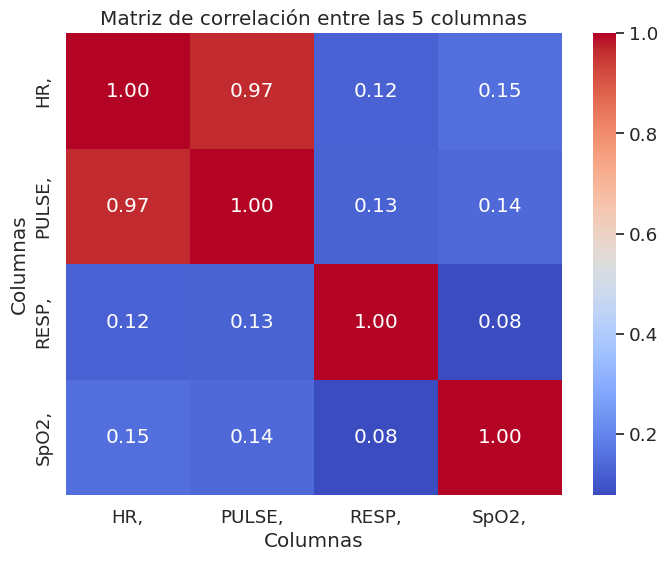

In [167]:
selected_columns = cleaned_data[:, :5]

correlation_matrix = np.corrcoef(selected_columns, rowvar=False)

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.set(font_scale=1.2)  # Escala del texto en el gráfico
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=nombres,
            yticklabels=nombres)
plt.title('Matriz de correlación entre las 5 columnas')
plt.xlabel('Columnas')
plt.ylabel('Columnas')
plt.show()

In [ ]:
record53w = wfdb.rdrecord('/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01')
record53n = wfdb.rdrecord('/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc02n')

In [ ]:
print(record53n.comments)
#record53n.comments.append("holi")
#wfdb.io.wrsamp(record53n.record_name, record53n.fs, record53n.units, record53n.sig_name, record53n.p_signal, record53n.d_signal, record53n.fmt, record53n.adc_gain, record53n.baseline, record53n.comments, record53n.base_time, record53n.base_date, record53n.base_datetime, write_dir='/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc_csv')

['<age>: 88 <sex>: M <location>: micu <source>: http://physionet.org/physiobank/database/mimic2wdb/matched/s01182/3017887n.dat <modifications>: this is not a verbatim copy of an original file. Please see the accompanying LICENSE.txt file for further details.']


In [131]:
signals, fields = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc06")

In [132]:
fields

{'fs': 125,
 'sig_len': 60001,
 'n_sig': 7,
 'base_date': None,
 'base_time': None,
 'units': ['pm', 'mmHg', 'mmHg', 'NU', 'mV', 'mV', 'mV'],
 'sig_name': ['RESP,', 'ABP,', 'CVP,', 'PLETH,', 'II,', 'V,', 'AVR,'],
 'comments': ['<age>: 64 <sex>: F <location>: micu <source>: https://physionet.org/physiobank/database/mimic2wdb/matched/s03386/ <data segment>: 2577-07-30-13-04<modifications>: this is not a verbatim copy of an original file. Please see the accompanying LICENSE.txt file for further details.']}

In [126]:
signals.shape

(481, 4)

In [ ]:
signals, fields = wfdb.io.rdsamp("/content/bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01")

In [ ]:
fields

{'fs': 125,
 'sig_len': 60001,
 'n_sig': 5,
 'base_date': None,
 'base_time': None,
 'units': ['pm', 'NU', 'mV', 'mV', 'mV'],
 'sig_name': ['RESP,', 'PLETH,', 'V,', 'AVR,', 'II,'],
 'comments': ['<age>: 88 <sex>: M <location>: micu <source>: https://physionet.org/physiobank/database/mimic2wdb/matched/s01182/ <data segment>: 2688-03-25-23-14<modifications>: this is not a verbatim copy of an original file. Please see the accompanying LICENSE.txt file for further details.']}

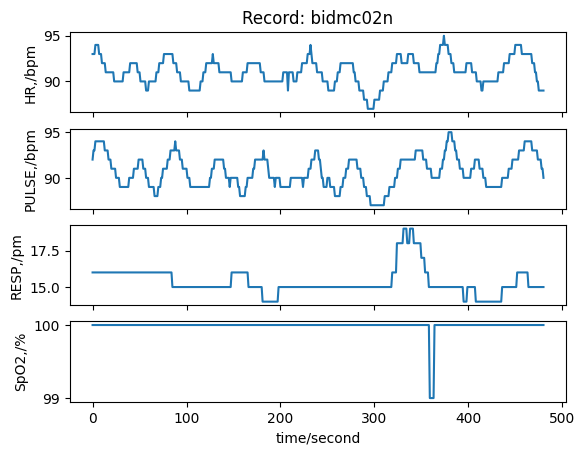

In [ ]:
wfdb.plot_wfdb(record=record53n)

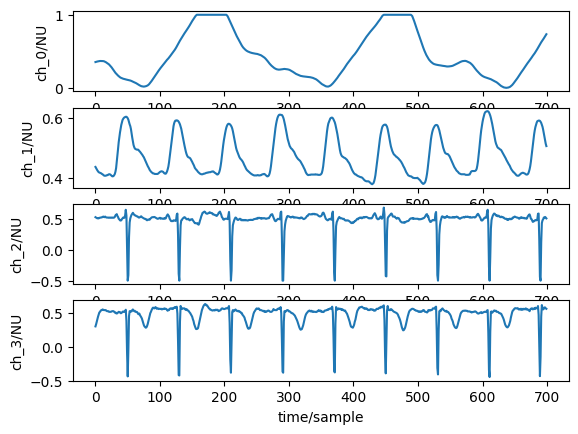

In [ ]:
wfdb.plot.plot_items(signals[0:700,0:-1])

# **Wrist PPG During Exercise**

## **Tipos de pacientes**

Se pidió a los participantes que realizaran uno o más tipos diferentes de ejercicio, con cuatro opciones disponibles:
* Caminar en una cinta de correr a un ritmo normal durante hasta 10 minutos.
*Correr/jogging ligero en una cinta de correr, a un ritmo establecido por el participante, durante hasta 10 minutos.
* Pedaleo en una bicicleta estática con baja resistencia durante hasta 10 minutos.
* Pedaleo en una bicicleta estática con una resistencia más alta durante hasta 10 minutos.

El objetivo era introducir una variedad de artefactos de movimiento representativos en las señales cardíacas recopiladas, no llevar a cabo una rutina de ejercicio establecida. Como tal, cada participante era libre de establecer el ritmo de la cinta de correr y la frecuencia de pedaleo en la bicicleta para que estuvieran cómodos, y también de cambiar estos ajustes o detener el ejercicio en cualquier momento. La mayoría de los participantes pasaron entre **4 y 6 minutos** en cada actividad. En todos los casos, el sujeto partía desde el reposo. Todas **las señales se muestrearon a 256 Hz**. Hay registros de **8 participantes presentes** (3 hombres, 5 mujeres), con edades de 22 a 32 años (promedio de 26,5).

## **Variables**
* chest_ecg: ecg de pecho tomado en mV
* wrist_ppg: PPG de muñeca tomado en mV
* wrist_gyro_x, wrist_gyro_y, wrist_gyro_z: giroscopio de muñeca en los ejes X, Y y Z respectivamente en grados por segundo (degs^-1).

* wrist_low_noise_accelerometer_x, wrist_low_noise_accelerometer_y wrist_low_noise_accelerometer_z: acelerómetro de baja frecuencia de muñeca en los ejes X, Y y Z respectivamente en metros por segundo cuadrado (ms^-2).

* wrist_wide_range_accelerometer_x, wrist_wide_range_accelerometer_y, wrist_wide_range_accelerometer_z: acelerómetro de rango amplio de muñeca en los ejes X, Y y Z respectivamente en metros por segundo cuadrado (ms^-2).

* wrist_mag_x, wrist_mag_y, wrist_mag_z: magnetómetro de muñeca en los ejes X, Y y Z respectivamente en gauss (Ga)

* sample_times_for_all_signals_apart_from_ecg: tiempos de muestra para todas las señales aparte del ECG en segundos (s).


In [ ]:
signals, fields = wfdb.io.rdsamp("/content/wrist-ppg-during-exercise-1.0.0/s1_low_resistance_bike")

In [ ]:
signals.shape

(148225, 15)

In [ ]:
fields

{'fs': 256,
 'sig_len': 148225,
 'n_sig': 15,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'degs^-1',
  'degs^-1',
  'degs^-1',
  'ms^-2',
  'ms^-2',
  'ms^-2',
  'ms^-2',
  'ms^-2',
  'ms^-2',
  'Ga',
  'Ga',
  'Ga',
  's'],
 'sig_name': ['chest_ecg',
  'wrist_ppg',
  'wrist_gyro_x',
  'wrist_gyro_y',
  'wrist_gyro_z',
  'wrist_low_noise_accelerometer_x',
  'wrist_low_noise_accelerometer_y',
  'wrist_low_noise_accelerometer_z',
  'wrist_wide_range_accelerometer_x',
  'wrist_wide_range_accelerometer_y',
  'wrist_wide_range_accelerometer_z',
  'wrist_mag_x',
  'wrist_mag_y',
  'wrist_mag_z',
  'sample_times_for_all_signals_apart_from_ecg'],
 'comments': ['low_resistance biking_level 4']}

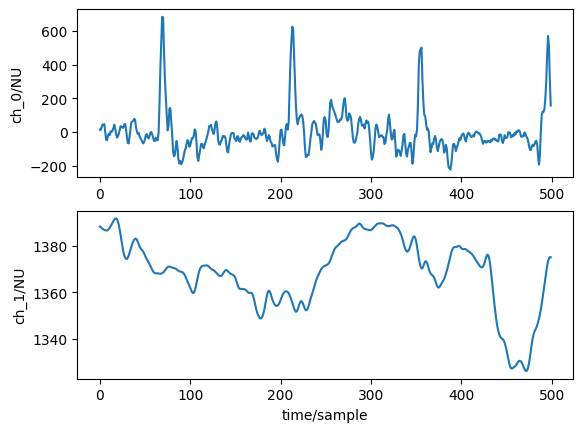

In [ ]:
plt.ion()
signals[0:-1,0:2].shape
wfdb.plot.plot_items(signals[0:500,0:2], )